# Veri Görselleştirme ve Keşifçi veri analizi

## Data visualization and explatory data analysis

# Matplotlib

* Temel bir veri görselleştirme aracıdır.
* Low-level bir görselleştirme sağlar
* Diğer veri görselleştirme kütüphanelerinin temelidir

# Pandas

* Matplotlib üzerine inşaa edilmiştir
* Kullanımı matplotlib kıyasla daha kolaydır
* Gelişmiş bir arayüze sahiptir

# Seaborn

* Matplotlib üzerine inşaa edilmiştir
* High level API vardır
* Sade ve kolay bir yapısı vardır

# GGPLOT

* R dünyasının görselleştirme aracıdır.
* En yetenekli veri görselleştirme araclarından biridir
* Katman mantığı ile çalışır.

# Bokeh

* Matplotlib üzerine inşaa edilmemiştir.
* İnteraktif bir görselleştirme aracıdır.
* Hızlı ve sade bir kullanımı vardır

## First sight of our dataset
## Veri setine ilk bakış

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### What is the our story for this data?
### Veri setimizin hikayesi nedir?

In [3]:
# Veri setinin bir kopyasının alınması 
df = planets.copy()

In [4]:
df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [6]:
# Veri setinin yapısal bilgileri nelerdir?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
# veri setinin değişkenlerinin veri tipleri nelerdir?
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [14]:
# method burada object tipinde(kategorik değişken)
import pandas as pd

In [13]:
# object türünden categorical türüne değişim yapalım
df["method"] = pd.Categorical(df["method"])

In [12]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# Betimleme
# Describe

In [16]:
df.shape
# 1035 gözlem ve 6 değişken

(1035, 6)

In [17]:
df.columns
# Değişken isimleri

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [19]:
df.describe().T
# veri setinin dağılımını değişkenlere göre ilk gözlem yapma amacıyla kullanabiliriz...
# Ortalama, Standart Sapma(std), min ve max değerleri ilk bakış sunar.
# Örneğin kütledeki standart sapmanın değeri.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [20]:
df.describe(include = 'all').T
# include all mantığı kategorik değişkenleri de dahil eder. Fakat ilk bakış anlamsız olur.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


# Eksik değerlere ilk bakış
# Missing Values

* Veri setimizde herhangi bir eksik(null) değer var mı?

In [21]:
df.isnull().values.any()

True

In [ ]:
# True döndüyse hangi değişkenden kaçar tane eksik değerimiz var?

In [22]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
# Görüldüğü gibi orbital_period,mass, distance gibi değişkenlerde belirli bir eksik değer var.

# Fillna ile doldurma işlemi

In [26]:
df['orbital_period'].fillna(0,inplace = True)

In [27]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [31]:
df.mass.fillna(df.mass.mean(),inplace = True)

In [32]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [33]:
# Tüm boş değerleri ortalamaya göre doldurma

df.fillna(df.mean(),inplace = True)

* Bu haliyle veri setimizin tamamen yapısallığı bozuldu fakat önceden veriseti.copy() yaptıgımız için verisetinin orijinal hali bizde.

In [34]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [35]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

* Veri seti ilk haliyle bizimle

# Kategorik değişkenlere erişme

In [36]:
kat_df = df.select_dtypes(include = ["object"])

In [38]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [40]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [45]:
kat_df['method'].value_counts().count()
# 10 tane method türünde değişkene sahibiz.

10

In [ ]:
# hangi kategorik değişkenden kaçtane var?

In [47]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

# ilk görselleştirme ile kategorik değişkenleri saydırma.

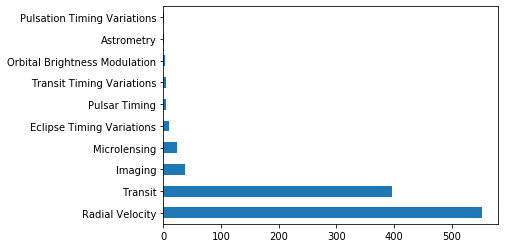

In [49]:
df['method'].value_counts().plot.barh();

# Sürekli değişken özetleri...

In [50]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [51]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [52]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [53]:
df_num['distance'].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

# Dağılım grafikleri
# Distribution Graphs

### Barplot

In [2]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Veri bize ne söylüyor?
#### What tells us our data ?

* carat: ağırlık
* cut : kalite
* color: renk(J en kötü)(worst), D(en iyi)(best)
* clarity : berraklık (I1 worst), IF(best)
* depth: elmas derinlik yüzdesi
* price: fiyat($)    
* table: elmasın derin noktaya göre genişliği    

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [11]:
df.select_dtypes(["object"]).head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [12]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
# İdeal > Premium >Very Good > Good > Fair

In [13]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
# J < I <D < H < F < E < G

In [16]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
# Kalite sıralamasına uygun bir şekilde düzenlemek için;
from pandas.api.types import CategoricalDtype

In [19]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [22]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [24]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [25]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

* Sıralama veri setine uygun olmadığından kendi belirlediğimiz sıralama üzerinden işlem yapmalıyız.

In [26]:
category = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [27]:
df["cut"] = df["cut"].astype(CategoricalDtype(ordered = True, categories = category))

In [28]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [29]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: object

In [30]:
df["color"] = df["color"].astype(CategoricalDtype(ordered = True))

In [31]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]

* Veri seti hikayesine göre bu sıralama da doğru değil!!!

In [35]:
order = ["J","I","G", "E", "F", "H", "D"]

In [36]:
df.color = df.color.astype(CategoricalDtype(ordered = True, categories = order))

In [37]:
df.color.head()

0      E
1      E
2      E
3    NaN
4    NaN
Name: color, dtype: category
Categories (7, object): [J < I < G < E < F < H < D]

In [ ]:
# Renk kalite sıralaması veri setine uygun hale getirildi...

# Görselleştirme(barplot)

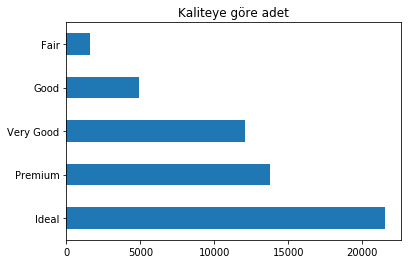

In [48]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title( "Kaliteye göre adet"));

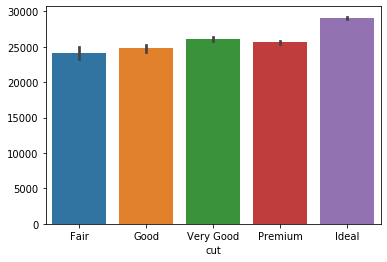

In [52]:
sns.barplot(data = df, x = "cut", y = df.cut.index);

# Çaprazlama işlemleri

In [66]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
from pandas.api.types import CategoricalDtype
cat = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
col = ["J","I","H", "G", "F", "E", "D"]
df.cut = df.cut.astype(CategoricalDtype(ordered = True, categories = cat))
df.color = df.color.astype(CategoricalDtype(ordered = True, categories = col))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


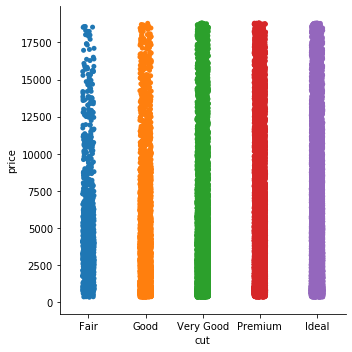

In [67]:
sns.catplot(x = "cut", y = "price", data = df);

* Çaprazlama eklemek için "HUE" parametresi eklenir.

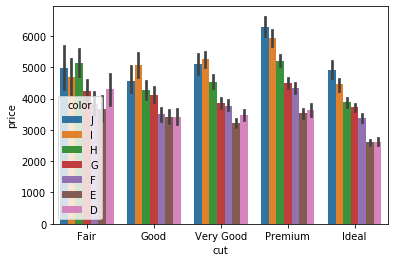

In [68]:
sns.barplot(x = "cut", y = "price", hue = "color" , data = df);

In [71]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

# Histogram

In [ ]:
# Sayısal değişkenlerin dağılımı(distribution) için kullanılan bir görselleştirme türüdür.

In [74]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


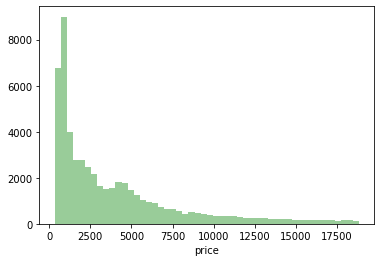

In [85]:
sns.distplot(df.price, color = "green", kde = False);

In [77]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether

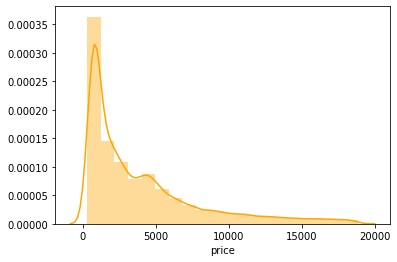

In [92]:
sns.distplot(df.price, bins=20 , color = "orange", kde = True);

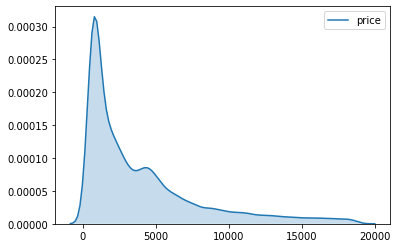

In [94]:
sns.kdeplot(df.price, shade = True);

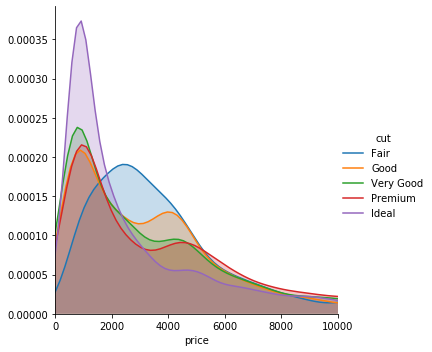

In [105]:
sns.FacetGrid(df,hue = "cut",height = 5,xlim =(0, 10000)).map(sns.kdeplot,"price", shade = True).add_legend();

In [98]:
?sns.FacetGrid

Init signature:
sns.FacetGrid(
    data,
    row=None,
    col=None,
    hue=None,
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None,
)
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimensio

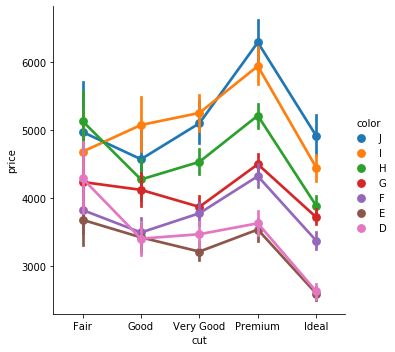

In [109]:
sns.catplot(x = "cut", y = "price", hue = "color", data = df, kind = 'point');

# Box Plot

In [ ]:
# Sayısal değişkenin dağılımı incelenmek isteniyorsa box plot(kutu grafiği) kullanılabilir.

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* total_bill = toplam fiş fiyatı
* tip : bahşiş
* sex: cinsiyet
* smoker: Sigara içip içmeme durumu
* day: Haftanın günü
* time: Zaman(Akşam,Sabah)  
* size: kişi sayısı

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
# Min 1 $ bahşiş bırakılmış.
# Max 10 $ bahşiş bırakılmış.
# Max 6 kişi beraber yemek yemiş.
# Minimum 1 kişi yemek yemiş.

In [7]:
df_cat = df.select_dtypes(["category"])
df_cat.head()


,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [8]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
# 187 erkek 87 kadın var.

In [9]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
# 151 kişi sigara içmezken; 93 kişi içiyor

In [10]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [ ]:
# Genellikle akşam yemeği saati tercih edilmiş.

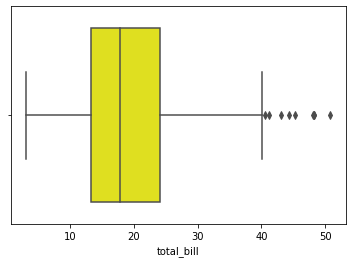

In [18]:
sns.boxplot(x = df["total_bill"], color = 'yellow');

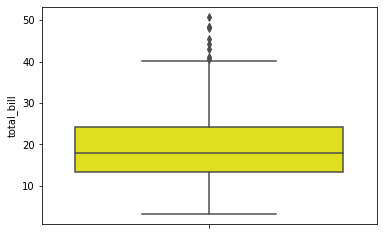

In [22]:
sns.boxplot(x = df['total_bill'], orient = 'v', color = 'yellow');

# hangi günler daha fazla kazanıyoruz?

In [27]:
df.groupby("day")["total_bill"].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [ ]:
# Saturday(Cumartesi en fazla kazandığımız gün.)

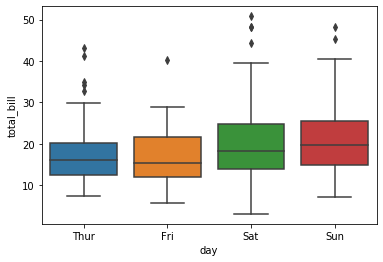

In [29]:
sns.boxplot(x = 'day', y = 'total_bill', data = df);
# Pazar günü daha az müşteri gelmesine karşın daha fazla para bırakıldığı görülüyor.
# Fakat cumartesi günü daha fazla müşteri çekiliyor.


In [31]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# Kazancımız sabah mı akşam mı daha fazla?

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
df.groupby("time")["total_bill"].sum()


time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

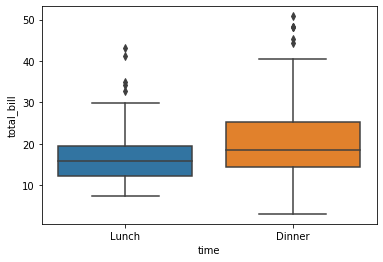

In [41]:
sns.boxplot(x = "time", y = 'total_bill', data = df);

In [ ]:
# Dinner(Akşam saatler belirgin bir farklılık söz konusu)

# Yemeğe gelen kişi sayısı ile kazanç arasındaki ilişki nasıldır?

In [43]:
df.groupby("size")["total_bill"].sum()

size
1      28.97
2    2565.89
3     884.55
4    1058.70
5     150.34
6     139.32
Name: total_bill, dtype: float64

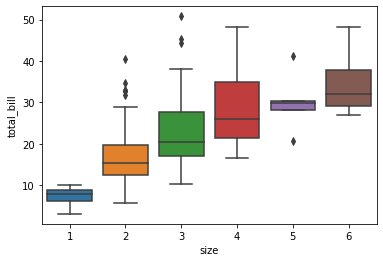

In [45]:
sns.boxplot(x = "size", y = "total_bill", data = df);

# Sigara içip içmemeye bakılarak bırakılan bahşiş ilişkisi nasıldır?

In [46]:
df.groupby("smoker")["tip"].sum()

smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64

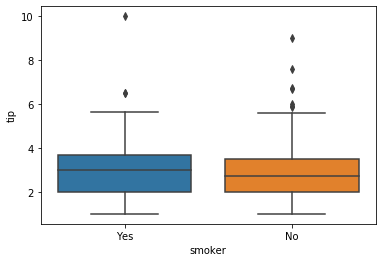

In [48]:
sns.boxplot(x = 'smoker', y = 'tip', data = df);

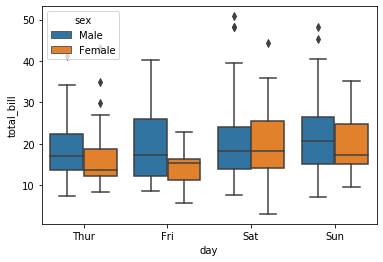

In [49]:
sns.boxplot( x = 'day', y = 'total_bill', hue = 'sex', data = df);

* Ağırlıklı olarak, günlere kıyasla, Erkekler kadınlardan daha fazla harcama yapmış.

# Korelasyon
# Correlation

* Değişkenler arası ilişkileri inceleyen istatistiki terimdir.

* Korelasyon grafikleri için SCATTER PLOT(saçılım grafiği kullanılabilir)
* Scatter plot ise en az iki sayısal değerin birbirleri ile ilişkilerini görselleştirmeye yardımcı olur

In [50]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


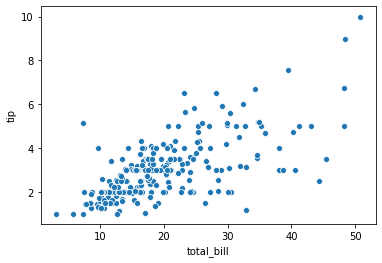

In [54]:
sns.scatterplot(x = 'total_bill', y =  'tip', data=  df);

In [ ]:
# İlk bakışta yapılan toplam harcama ile birlikte ödenen bahşiş miktarı da artmış denilebilir.

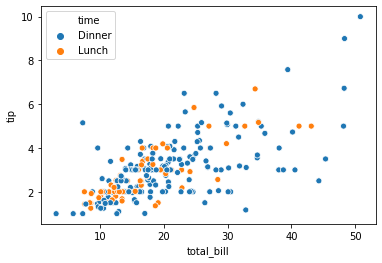

In [57]:
sns.scatterplot( x = 'total_bill', y = 'tip', hue = 'time', data = df);

In [ ]:
# Akşam yemeği zamanında verilen bahşiş daha çok saçılım göstermiş.
# Genellikle yapılan harcama, verilen bahşiş ile doğru orantılı

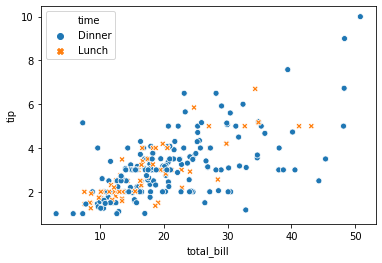

In [60]:
sns.scatterplot( x = 'total_bill', y = 'tip', hue = 'time', style = 'time', data = df);

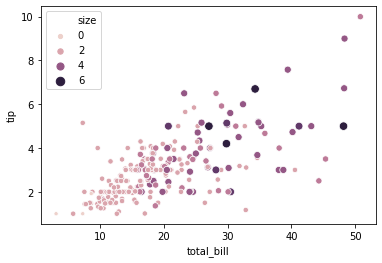

In [67]:
sns.scatterplot( x = 'total_bill',hue = 'size',  y = 'tip',size = 'size', data = df);

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# REGRESYON ANALİZİNİN YAPILMASI
# REGRESSION ANALYSIS

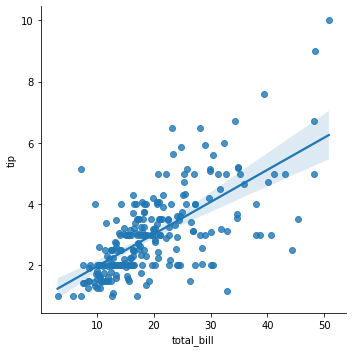

In [3]:
sns.lmplot(x = 'total_bill', y = 'tip', data = df);

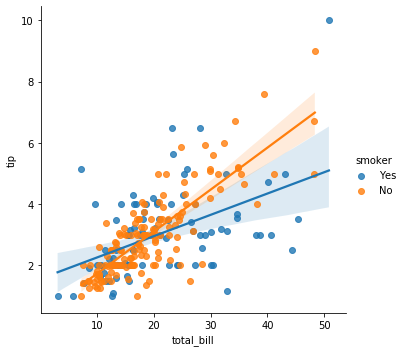

In [4]:
sns.lmplot(x = 'total_bill', y= 'tip', data = df, hue = 'smoker');

* Eğimlerde olan farklılıkta, burada sigara içmeyen kişilerin toplam yaptığı harcama ve bıraktığı bahşiş artıyor.
* Daha dik eğimler daha yüksek çıktı anlamına geliyor.

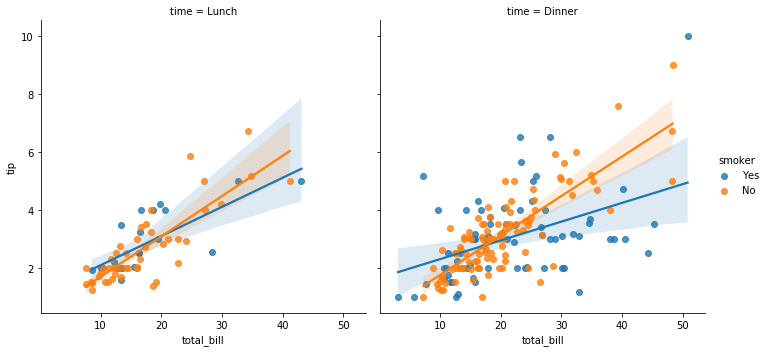

In [6]:
sns.lmplot( x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = df);

* Bariz farklılık Dinner zamanında eğimlerin daha dik ve akışın Lunch zamanına göre çok daha fazla olduğudur.

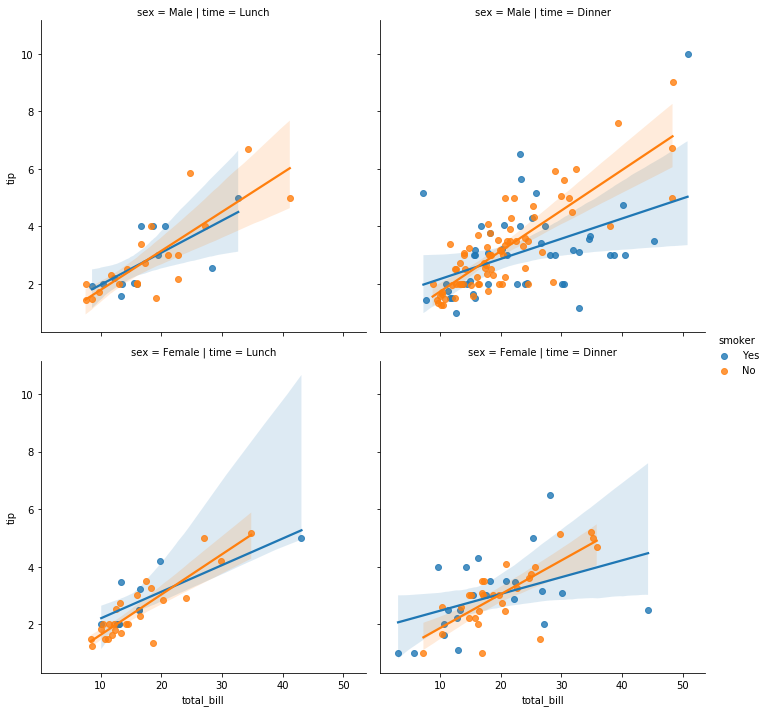

In [8]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', row = 'sex', data = df);

** Erkekler kadınlara göre çok daha fazla para harcama alışkanlığına sahip. Ve dinner zamanı lunch zamanına göre çok kalabalık

# Scatter Plot Matris

In [9]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


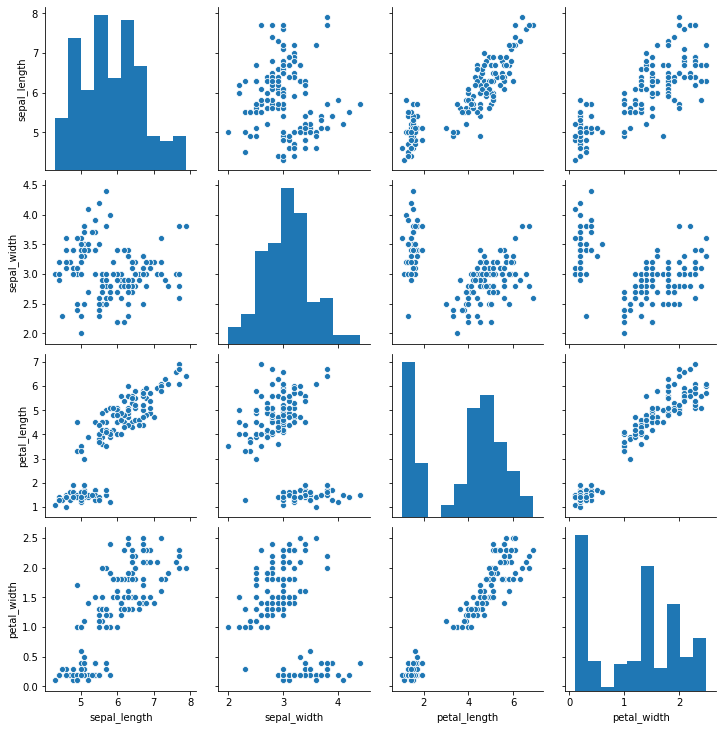

In [11]:
sns.pairplot(df);

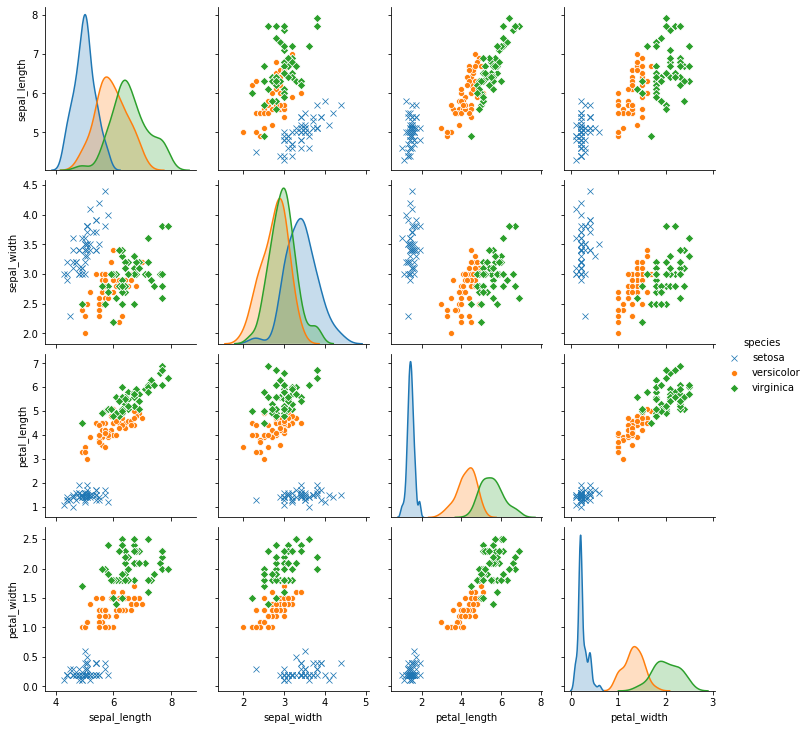

In [14]:
sns.pairplot(df, hue = 'species', markers = ['x', 'o', 'D']);

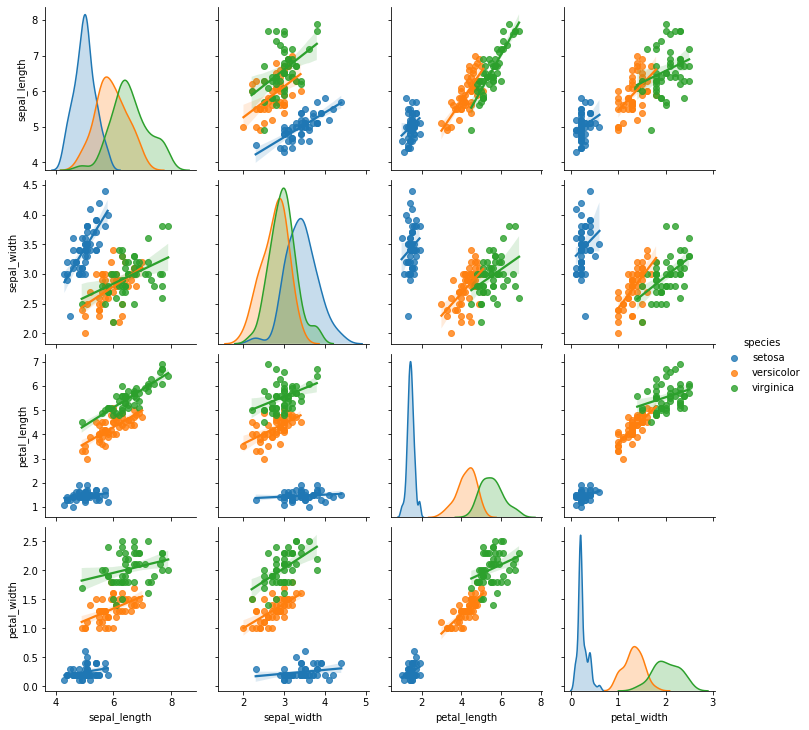

In [16]:
sns.pairplot(df, hue = 'species', kind = 'reg');

# HEATMAP

In [18]:
flight = sns.load_dataset("flights")
df = flight.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [19]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [20]:
df.shape

(144, 3)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [23]:
df['passengers'].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [24]:
# Heatmap oluşturma


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

* heatmap(ısı haritası) ile görselleştirme yapabilmek için verisetinin Pivot tablo şekline dönüştürülmesi gerekir.

In [29]:
df = df.pivot("month","year","passengers")


KeyError: 'month'

In [30]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


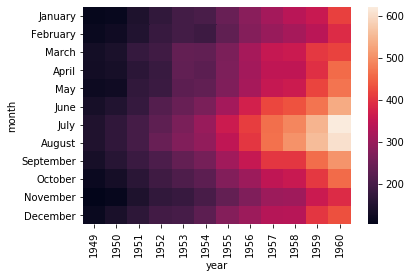

In [27]:
sns.heatmap(df);

In [ ]:
# June, July, August aylarında yolcu sayılarında artış söz konusu.
#Ayrıca yıldan yıla uçuş sayısı da artmış durumda.

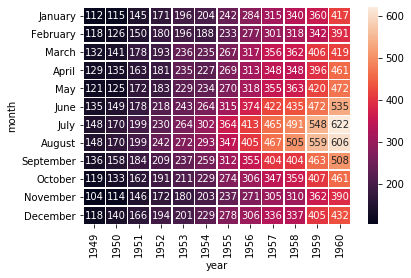

In [34]:
sns.heatmap(df, annot = True, fmt = 'd', linewidths = .5);

In [ ]:
# En fazla uçuş 1960 yılında July(Haziran) ayında gerçekleşmiş.

# Çizgi Grafik

# Line Plots

* Verilerin zamana göre incelenmesi için kullanılan bir görselleştirme tekniğidir.
* Örneğin bir IoT teknolojili makinenin zamana göre performansını ölçen ve bunu görselleştirmek isteyen bir kişi çizgi grafiği kullanabilir.

In [1]:
# Yeni veri setini "import" etme işlemi.
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


* subject: deneğin numarası(s1,s2....)
* timepoint: zaman noktası
* event: beyinde gerçekleşen olay
* region: beyin bölgesi
* signal: sinyal ya da şiddet    

In [4]:
df.shape
# 1064 gözlem ve 5 değişken var.

(1064, 5)

In [5]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [7]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [8]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [10]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [ ]:
# Her bir zaman aralığında eşit sayıda(56 defa) sinyal ölçülmüş.

In [12]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [ ]:
# Ölçülen her bir sinyal birbirlerinden farklı değerler ortaya çıkarmış.

In [13]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [ ]:
# Time pointlere göre artan bir standart sapma görülüyor.

# Çizgi grafiğin oluşturulması

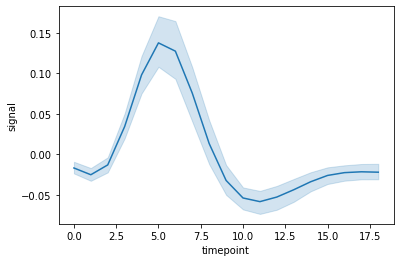

In [21]:
sns.lineplot(x = 'timepoint', y = 'signal', data = df);

* Koyu mavi çizgi ortalamayı gösterirken, açık mavi alan güven aralıklarını gösterir.

In [16]:
?sns.lineplot

Signature:
sns.lineplot(
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='brief',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and ``styl

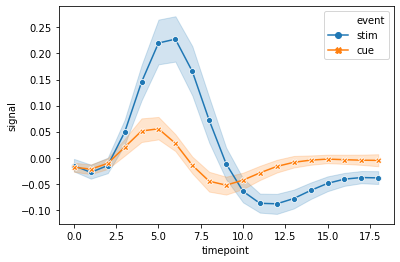

In [30]:
sns.lineplot(x = 'timepoint',
             y = 'signal',
             hue = 'event',
             style = 'event',          
             data = df, dashes = False, markers = True);

In [ ]:
# "Event" için "Stim" bölgesi "cue " bölgesinde 5.0 time point noktasında çok daha yüksek sinyaller vermiş.
# Ayrıca 8.0 9.0 timepoint arası stim şiddetli bir - sinyalli veriler göstermiş.
# 7.5 timepoint ve sonrası "cue" için stabil devam etmiş.

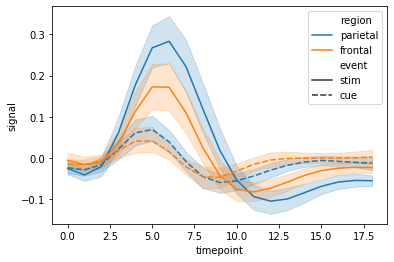

In [32]:
sns.lineplot(x = 'timepoint',
             y = 'signal',
             hue = 'region',
             style = 'event',          
             data = df);

# Zaman serisi grafiği

In [35]:
!pip install pandas_datareader
import pandas_datareader as pr
# Pandas veri okuyucu(dış kaynaklı verileri internetten yüklemeye yardımcı olur.)

In [37]:
df = pr.get_data_yahoo("GOOG", start = "2019-06-11", end = "2020-06-11")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976
2019-06-17,1099.180054,1086.280029,1086.280029,1092.500000,941600,1092.500000


In [ ]:
# GOOGLE şirketinin hisse değerlerini gösteren veri setine erişmiş olduk...

In [39]:
df.shape

(254, 6)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-06-11 to 2020-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [41]:
df.index

DatetimeIndex(['2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-21', '2019-06-24',
               ...
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [43]:
import pandas as pd

In [46]:
df.index =pd.DatetimeIndex(df.index)
# tarih sutunun tarih formatına çevirme işlemi.

In [47]:
df.index

DatetimeIndex(['2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-21', '2019-06-24',
               ...
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [48]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976
2019-06-17,1099.180054,1086.280029,1086.280029,1092.500000,941600,1092.500000


In [49]:
kapanis = df["Close"]

In [50]:
kapanis.head()

Date
2019-06-11    1078.719971
2019-06-12    1077.030029
2019-06-13    1088.770020
2019-06-14    1085.349976
2019-06-17    1092.500000
Name: Close, dtype: float64

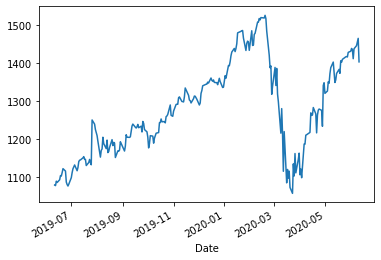

In [52]:
kapanis.plot();